# Exploratory Data Analysis

## Import Libraries & Data Prep Notebook

In [31]:
# Run an external Jupyter notebook file in the current notebook environment

%run /Users/emmam/Documents/Flatiron/phase_2/film-analytics/code/data_prep.ipynb

C:\Users\emmam\Documents\Flatiron\phase_2\film-analytics\data
Shape of df before concatenation: (1345, 17)
Shape of genre_df before concatenation: (1345, 21)
First few rows of df:
                         primary_title  start_year  average_rating  num_votes  \
0   diary of a wimpy kid rodrick rules        2011             6.6      23135   
3        diary of a wimpy kid dog days        2012             6.3      19571   
6   diary of a wimpy kid the long haul        2017             4.4       5635   
8                       blue valentine        2010             7.4     170089   
14          the place beyond the pines        2012             7.3     226765   

            director                               title studio  \
0       David Bowers  diary of a wimpy kid rodrick rules    FOX   
3       David Bowers       diary of a wimpy kid dog days    FOX   
6       David Bowers  diary of a wimpy kid the long haul    FOX   
8   Derek Cianfrance                      blue valentine   WEIN  

## Define Functions

In [32]:
# Calculate the Return on Investment (ROI) for each movie and add it as a new column in the DataFrame
df_cleaned.loc[:, 'roi'] = ((df_cleaned['worldwide_gross'] - df_cleaned['production_budget']) / df_cleaned['production_budget']) * 100

## Descriptive Statistics

In [33]:
# Display summary statistics for numerical columns in the cleaned DataFrame
df_cleaned.describe()

,start_year,average_rating,num_votes,domestic_gross,year,popularity,vote_average,vote_count,production_budget,worldwide_gross,...,crime,documentary,science fiction,mystery,music,romance,family,war,tv movie,roi
count,1241.000000,1241.000000,1.241000e+03,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03,1.241000e+03,...,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,2013.601934,6.378646,1.042454e+05,4.251071e+07,2013.701048,11.896720,6.300886,1667.675262,3.835513e+07,1.016967e+08,...,0.134569,0.018533,0.099114,0.078969,0.030620,0.140210,0.097502,0.024980,0.000806,349.380871
std,2.526849,0.921939,1.257419e+05,4.303020e+07,2.533659,6.656989,0.913293,1981.521288,4.256419e+07,1.192948e+08,...,0.341400,0.134925,0.298935,0.269798,0.172357,0.347344,0.296760,0.156127,0.028387,1388.031581
min,2010.000000,1.600000,7.000000e+00,8.000000e+02,2010.000000,0.600000,0.000000,1.000000,5.000000e+04,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000
25%,2011.000000,5.800000,2.426700e+04,7.100000e+06,2011.000000,8.143000,5.800000,353.000000,1.000000e+07,1.753600e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.051448
50%,2014.000000,6.400000,6.647500e+04,3.010000e+07,2014.000000,10.816000,6.300000,977.000000,2.500000e+07,5.808524e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.816500
75%,2016.000000,7.000000,1.313650e+05,6.250000e+07,2016.000000,14.738000,6.900000,2229.000000,5.000000e+07,1.426344e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,307.124940
max,2019.000000,8.700000,1.211405e+06,1.770000e+08,2018.000000,78.123000,10.000000,15725.000000,2.750000e+08,8.797651e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41556.474000


In [34]:
# Melt the DataFrame
# Filter out rows where the movie is not in the genre
# Group by genre and calculate descriptive statistics for domestic_gross

melted_df = df.melt(id_vars=['primary_title', 'domestic_gross'], value_vars=genre_columns, var_name='genre', value_name=
                    'is_genre')

melted_df = melted_df[melted_df['is_genre'] == 1]

genre_gross_stats = melted_df.groupby('genre')['domestic_gross'].describe()

genre_gross_stats

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,353.0,1.020554e+08,1.218892e+08,800.0,25000000.0,57700000.0,128300000.0,700100000.0
adventure,254.0,1.367552e+08,1.326412e+08,1000.0,40450000.0,95550000.0,197950000.0,700100000.0
animation,98.0,1.473234e+08,1.272615e+08,1000.0,57575000.0,121450000.0,190975000.0,700100000.0
comedy,459.0,6.510775e+07,7.530657e+07,800.0,16000000.0,42900000.0,82500000.0,486300000.0
crime,177.0,5.020243e+07,7.122725e+07,800.0,8300000.0,26300000.0,54700000.0,448100000.0
documentary,24.0,3.833902e+07,5.647081e+07,7500.0,2475000.0,16200000.0,49000000.0,248800000.0
drama,632.0,3.689052e+07,5.419924e+07,1200.0,3475000.0,17800000.0,46425000.0,448100000.0
family,150.0,1.159444e+08,1.032903e+08,1000.0,48250000.0,82550000.0,162575000.0,608600000.0
fantasy,147.0,1.144797e+08,1.225344e+08,4100.0,30750000.0,63900000.0,172300000.0,700100000.0


From this data:

- **Animation** boasts the highest mean worldwide gross (147,323,400), indicating exceptional average performance.
- **Adventure** and **Action** follow closely with high mean values (136,755,200 and 102,055,400), highlighting their consistent box office success.
- **Family** and **Science Fiction** genres also show strong profitability with mean values of 115,944,400 and &#36;115,452,600 respectively.
- **Comedy**, despite a lower mean (65,107,750), demonstrates a significant range in gross revenue, with top-performing films reaching up to 486,300,000.




## Correlation Analysis

In [36]:
# Calculate the correlation matrix for selected columns
corr_matrix = df_cleaned[['vote_average', 'vote_count',  'popularity', 'num_votes', 'domestic_gross', 'worldwide_gross']].corr()
corr_matrix

,vote_average,vote_count,popularity,num_votes,domestic_gross,worldwide_gross
vote_average,1.000000,0.321418,0.218562,0.332478,0.101033,0.090586
vote_count,0.321418,1.000000,0.610593,0.844521,0.579699,0.625124
popularity,0.218562,0.610593,1.000000,0.404077,0.420610,0.480458
num_votes,0.332478,0.844521,0.404077,1.000000,0.525692,0.517787
domestic_gross,0.101033,0.579699,0.420610,0.525692,1.000000,0.862779
worldwide_gross,0.090586,0.625124,0.480458,0.517787,0.862779,1.000000


#### General Insights:
- Vote count is strongly correlated with popularity (0.61) and moderately correlated with the number of votes (0.84).
- Popularity is moderately correlated with vote count (0.61) and the number of votes (0.41).
- The number of votes is moderately correlated with vote count (0.84) and weakly correlated with popularity (0.41).
- Domestic gross and worldwide gross are strongly correlated (0.86), and both have weak correlations with the other variables.

## Visual Analysis

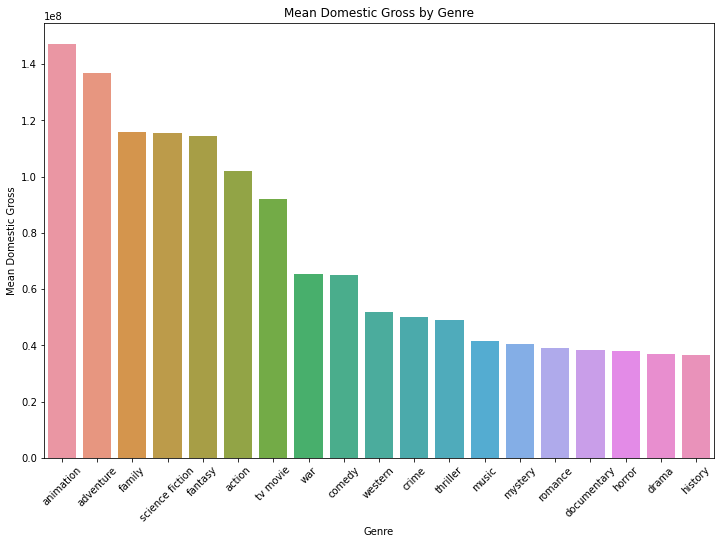

In [37]:
# Reset the index and rename the index column to 'genre'
# Sort the DataFrame by the 'mean' column

genre_gross_stats_reset = genre_gross_stats.reset_index().rename(columns={'index': 'genre'})

genre_gross_stats_sorted = genre_gross_stats_reset.sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_gross_stats_sorted, x='genre', y='mean')
plt.xlabel('Genre')
plt.ylabel('Mean Domestic Gross')
plt.title('Mean Domestic Gross by Genre')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Group by title and sum the 'worldwide_gross' for each title
#title_grouped = df_cleaned.groupby('title')['domestic_gross'].sum().reset_index()

# Sort by 'worldwide_gross' and select top 20 titles
#title_sorted = title_grouped.sort_values(by='domestic_gross', ascending=False).head(20)

#plt.figure(figsize=(10, 6))
#sns.barplot(x='domestic_gross', y='title', data=title_sorted)
#plt.title('Top 20 Titles by Domestic Gross')
#plt.xlabel('Worldwide Gross')
#plt.ylabel('Title')
#plt.show();

In [39]:
genre = 'animation'  

# Filter the DataFrame by genre
genre_df = df_cleaned[df_cleaned[genre] == 1]

# Group by director and calculate mean popularity
director_popularity_genre = genre_df.groupby('director')['popularity'].mean().sort_values(ascending=False).head(5)

director_popularity_genre

director
Dean DeBlois          27.106
Karey Kirkpatrick     26.231
Eric Darnell          20.899
Genndy Tartakovsky    19.562
Chris McKay           19.352
Name: popularity, dtype: float64

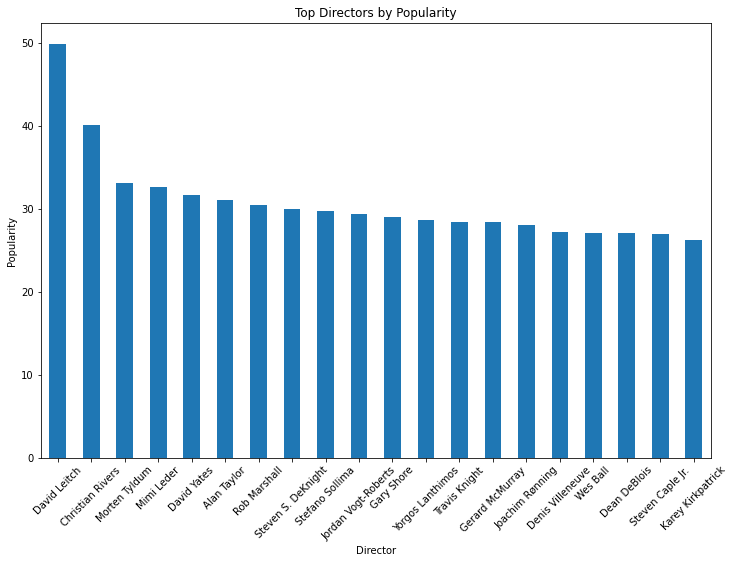

In [40]:
# Calculate the average popularity for each director and select top 20
director_popularity = df_cleaned.groupby('director')['popularity'].mean().sort_values(ascending=False).head(20)

# Plot top 20 directors by popularity
plt.figure(figsize=(12, 8))
director_popularity.plot(kind='bar')
plt.title('Top Directors by Popularity')
plt.xlabel('Director')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show();

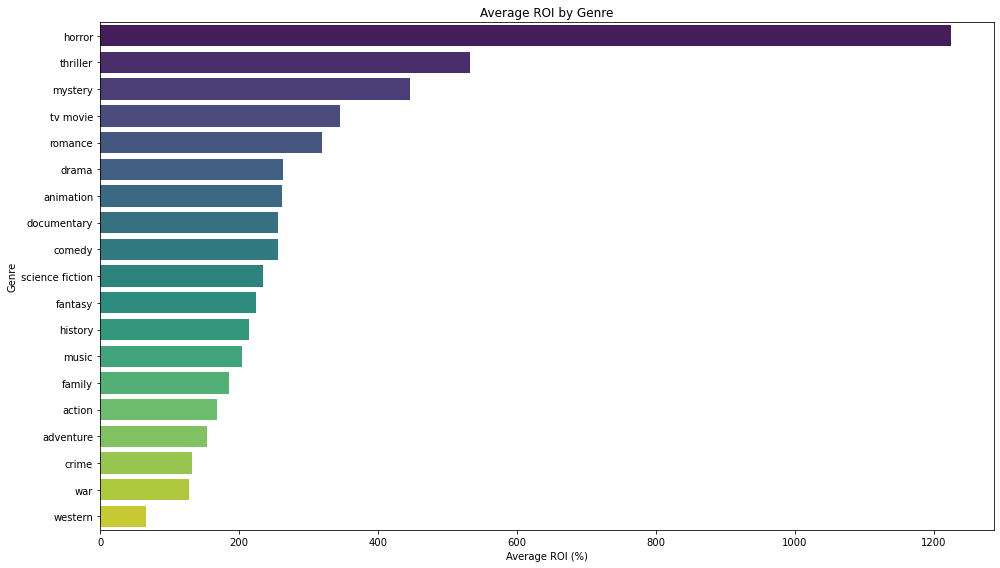

In [41]:
# Melt the DataFrame and filter for rows where the movie belongs to the genre
melted_df = df_cleaned.melt(id_vars=['title', 'roi'], value_vars=genre_columns, var_name='genre', value_name='is_genre')
melted_df = melted_df[melted_df['is_genre'] == 1]

# Group by genre and calculate the average ROI
genre_roi = melted_df.groupby('genre')['roi'].mean().reset_index()

# Sort by ROI in descending order and plot
genre_roi = genre_roi.sort_values(by='roi', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='roi', y='genre', data=genre_roi, palette='viridis')
plt.xlabel('Average ROI (%)')
plt.ylabel('Genre')
plt.title('Average ROI by Genre')
plt.tight_layout()
plt.show();

In [42]:
# Melt DataFrame to create a long-format DataFrame with one row per movie-genre combination
melted_df = df_cleaned.melt(id_vars=['title', 'director', 'popularity'], value_vars=genre_columns, var_name='genre', value_name='is_genre')

# Filter out rows where the movie is not in the genre
melted_df = melted_df[melted_df['is_genre'] == 1]

# Group by director and genre and calculate the total popularity for each pair
director_genre_popularity = melted_df.groupby(['genre', 'director'])['popularity'].sum().reset_index()

# Find the most popular director for each genre
most_popular_director_by_genre = director_genre_popularity.loc[director_genre_popularity.groupby('genre')['popularity'].idxmax()]

print("Most popular director by genre:")
print(most_popular_director_by_genre)

Most popular director by genre:
                genre            director  popularity
50             action        David Leitch      99.785
346         adventure        Ridley Scott     107.868
404         animation  Genndy Tartakovsky      58.686
675            comedy      Peter Farrelly      71.590
859             crime           Paul Feig      51.973
910       documentary       Jeff Tremaine      10.715
991             drama      Clint Eastwood      87.001
1420           family  Genndy Tartakovsky      58.686
1518          fantasy  Genndy Tartakovsky      58.686
1589          history      Clint Eastwood      38.352
1682           horror      James DeMonaco      71.763
1762            music     Damien Chazelle      35.082
1803          mystery       David Fincher      49.038
1912          romance    Derek Cianfrance      38.881
2062  science fiction    Denis Villeneuve      74.013
2200         thriller        David Leitch      99.785
2404         tv movie  Jaume Collet-Serra       2.

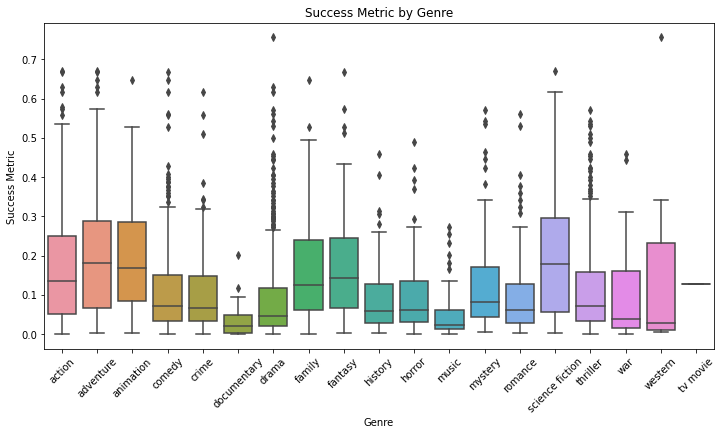

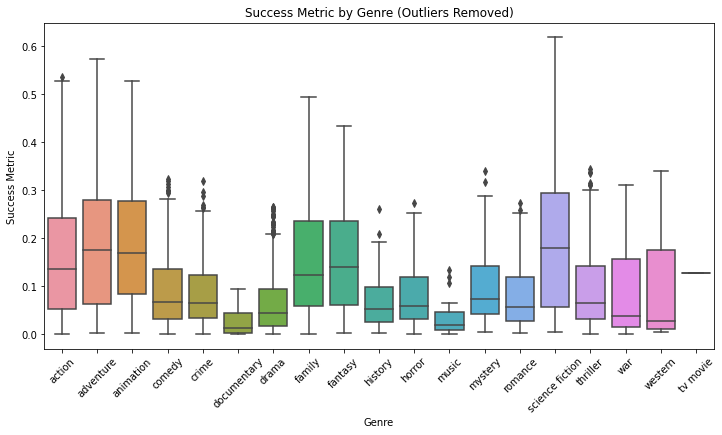

In [43]:
# Normalize 'worldwide_gross' and 'vote_count' columns, create a combined 'success_metric' based on these normalized values

roi_min = df_cleaned['worldwide_gross'].min()
roi_max = df_cleaned['worldwide_gross'].max()
df_cleaned['normalized_worldwide_gross'] = (df_cleaned['worldwide_gross'] - roi_min) / (roi_max - roi_min)

vote_count_min = df_cleaned['vote_count'].min()
vote_count_max = df_cleaned['vote_count'].max()
df_cleaned['normalized_vote_count'] = (df_cleaned['vote_count'] - vote_count_min) / (vote_count_max - vote_count_min)

df_cleaned['success_metric'] = (df_cleaned['normalized_worldwide_gross'] + df_cleaned['normalized_vote_count']) / 2

df_cleaned.head()

# Melt the DataFrame to create a long-format DataFrame with one row per movie-genre combination
melted_df = df_cleaned.melt(id_vars=['primary_title', 'success_metric'], value_vars=genre_columns,
                            var_name='genre', value_name='genre_value')

# Filter out rows where the movie is not in the genre
melted_df = melted_df[melted_df['genre_value'] == 1]

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='success_metric', data=melted_df)
plt.xticks(rotation=45)
plt.title('Success Metric by Genre')
plt.xlabel('Genre')
plt.ylabel('Success Metric')
plt.show()

# Remove outliers for success metric per genre
filtered_dfs = []
for genre in genre_columns:
    genre_df = melted_df[melted_df['genre'] == genre]
    filtered_df = remove_outliers(genre_df, 'success_metric')
    filtered_dfs.append(filtered_df)

# Concatenate the filtered DataFrames
filtered_melted_df = pd.concat(filtered_dfs)

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='success_metric', data=filtered_melted_df)
plt.xticks(rotation=45)
plt.title('Success Metric by Genre (Outliers Removed)')
plt.xlabel('Genre')
plt.ylabel('Success Metric')
plt.show();

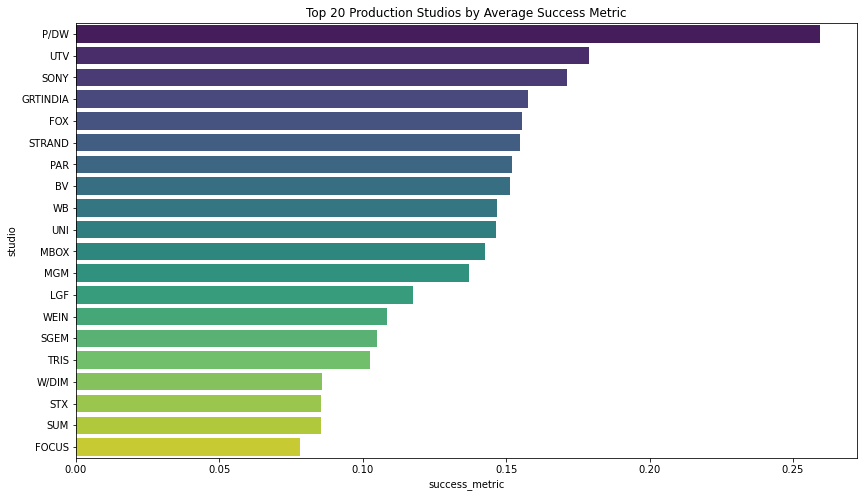

In [44]:
# Group by studio and calculate the average success metric for each studio
studio_success = df_cleaned.groupby('studio')['success_metric'].mean().reset_index()

# Sort the studios by their average success metric in descending order
studio_success = studio_success.sort_values(by='success_metric', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='success_metric', y='studio', data=studio_success.head(20), palette='viridis')
plt.title('Top 20 Production Studios by Average Success Metric')
plt.show();

### 1. **Primary Focus: Family-Oriented Animation**
   - **Why I Chose This**: Animation continues to be a reliable genre with broad appeal and consistent profitability. It's still one of the safest bets for long-term returns.
   - **What I’d Recommend**: Focus on **producing or acquiring animated family films**. These films deliver steady box office returns across multiple demographics, both domestically and globally.

### 2. **High-ROI Opportunity: Horror Films**
   - **Why I Chose This**: Horror has the **highest ROI**, meaning that even with relatively low budgets, these films can generate impressive profits. Horror tends to perform well across both theatrical and streaming releases, and it often has a loyal fanbase.
   - **What I’d Recommend**: Invest in **low to mid-budget horror films**. This genre offers the best opportunity to maximize returns while keeping financial risks relatively low.

### 3. **Supplementary Strategy: Action-Adventure Blockbusters**
   - **Why I Chose This**: Action and Adventure films still perform well globally, especially when backed by high-profile directors. These films can serve as big-ticket items to boost box office numbers and generate significant revenue.
   - **What I’d Recommend**: Balance the portfolio with **a few high-budget action-adventure films**. These films can boost brand visibility and offer significant revenue upside, even though they carry higher production costs.